<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization
from keras.models import load_model

In [85]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [86]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [87]:
# x_val = x_train[-10000:]
# y_val = y_train[-10000:]
# x_train = x_train[:-10000]
# y_train = y_train[:-10000]

In [88]:
w_init_tanh = initializers.glorot_normal(seed=42)
w_init_relu = initializers.HeNormal(seed=42)
b_init = initializers.Zeros()

In [89]:
model = tf.keras.Sequential()

drop_out = 0.25
lern_rat = 0.001
neurons = 1024
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(drop_out))

model.add(BatchNormalization())
model.add(layers.Dense(neurons * 1,
                       activation='relu',
                       kernel_initializer=w_init_relu,
                       bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 1,
#                        activation='relu',
#                        kernel_initializer=w_init_relu,
#                        bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 1,
#                        activation='relu',
#                        kernel_initializer=w_init_relu,
#                        bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 2,
#                        activation='relu',
#                        kernel_initializer=w_init_relu,
#                        bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(layers.Dropout(drop_out))

model.add(BatchNormalization())
model.add(layers.Dense(neurons * 2,
                       activation='tanh',
                       kernel_initializer=w_init_tanh,
                       bias_initializer=b_init))
model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 2,
#                        activation='relu',
#                        kernel_initializer=w_init_relu,
#                        bias_initializer=b_init))
# model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 2,
#                        activation='tanh',
#                        kernel_initializer=w_init_tanh,
#                        bias_initializer=b_init))
# model.add(layers.Dropout(drop_out))

model.add(BatchNormalization())
model.add(layers.Dense(neurons * 2,
                       activation='relu',
                       kernel_initializer=w_init_relu,
                       bias_initializer=b_init))
model.add(layers.Dropout(drop_out))
# model.add(layers.Dense(neurons * 2, activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [90]:
model.compile(#optimizer='adam',
              # optimizer='adamax',
              optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 181ms/step


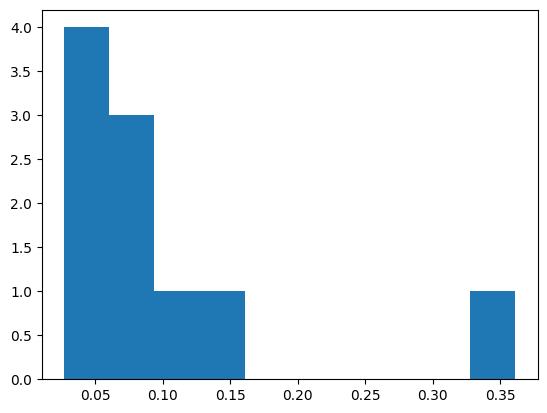

In [91]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [92]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [93]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=50,
                                   restore_best_weights=True,
                                   )
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='sparse_categorical_accuracy', mode='max', verbose=0, save_best_only=True)


In [94]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    # callbacks=[callback],
                    callbacks=[mc],
                    verbose=1, #многословие
                    validation_split=0.2
                    # validation_data=(x_val, y_val)
                    )
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/100
375/375 [==============================] - 7s 9ms/step - loss: 0.8295 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.5086 - val_sparse_categorical_accuracy: 0.8332
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 0.5157 - sparse_categorical_accuracy: 0.8221 - val_loss: 0.4082 - val_sparse_categorical_accuracy: 0.8568
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 0.4475 - sparse_categorical_accuracy: 0.8394 - val_loss: 0.3741 - val_sparse_categorical_accuracy: 0.8632
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 0.4122 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.3738 - val_sparse_categorical_accuracy: 0.8676
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 0.3885 - sparse_categorical_accuracy: 0.8553 - val_loss: 0.3471 - val_sparse_categorical_accuracy: 0.8760
Epoch 6/100
375/375 [==============================] - 4s 9ms/step - loss: 0.3807 - sparse_cate

In [95]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


In [96]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 0.3469 - sparse_categorical_accuracy: 0.8992
[0.3469482958316803, 0.8992000222206116]


In [97]:
saved_model = load_model('best_model.h5')
result = saved_model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 4ms/step - loss: 0.3605 - sparse_categorical_accuracy: 0.8976
[0.3605424463748932, 0.897599995136261]


In [98]:
# from keras.models import load_model
# saved_model = load_model('best_model.h5')
# # _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Test: %.3f' % (test_acc))

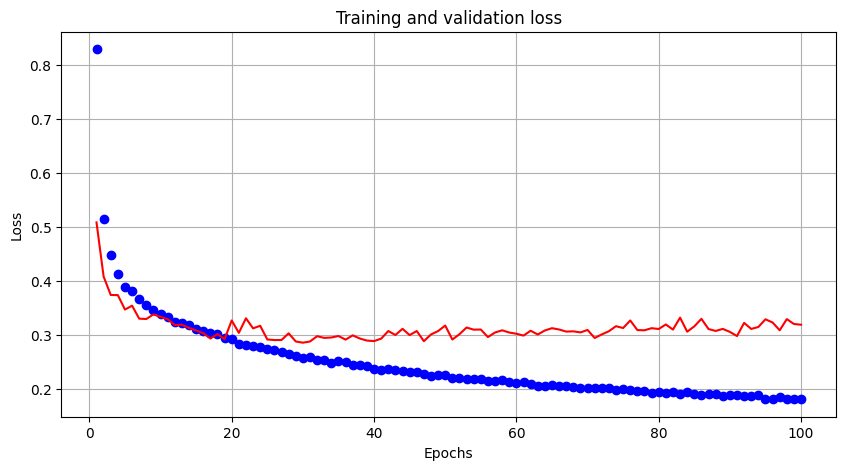

<Figure size 640x480 with 0 Axes>

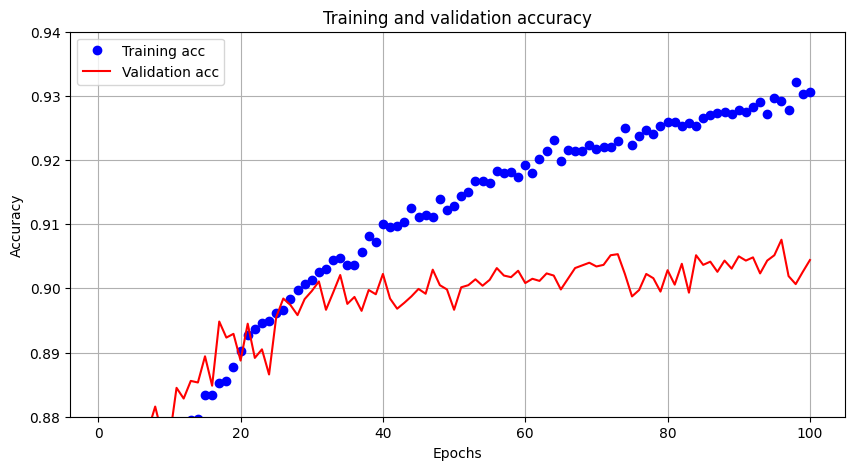

In [99]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
# plt.ylim (0.2, 0.5)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.legend()
plt.grid(True)
plt.show()
1
plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'r', label='Validation acc')
plt.ylim (0.88, 0.94)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [100]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [101]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [102]:
predictions[0]

array([0.08533868, 0.08533868, 0.08533868, 0.08533868, 0.08533868,
       0.08533869, 0.08533868, 0.08535188, 0.08533868, 0.23193866],
      dtype=float32)

In [103]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dropout_20 (Dropout)        (None, 784)               0         
                                                                 
 batch_normalization_16 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_20 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_21 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_17 (Ba  (None, 1024)              4096      
 tchNormalization)                                    